# LIBRARY AND CONFIGUATION

In [3]:
import pickle
import os
os.chdir('/home/pot/Desktop/web-scan')
print(os.getcwd())
import numpy as np
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    
import pathlib
import tensorflow.compat.v2 as tf
import cv2
import argparse
import time
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
from helpers import load_label_map as label_map_util
from helpers import visualization_utils as viz_utils
from helpers import corner_utils, ocr_helpers
from identity_card_model import CompletedModel

/home/pot/Desktop/web-scan


In [5]:
model = CompletedModel()

# CROP CORNER WITH OPENCV

In [56]:

def crop_image(img):
    img = np.asarray(img)
    edges_image = corner_utils.edges_det(img)
    edges_image = cv2.morphologyEx(edges_image, cv2.MORPH_CLOSE, np.ones((5, 11)))
    page_contour =  corner_utils.find_page_contours(edges_image)
    page_contour =  corner_utils.four_corners_sort(page_contour)
    crop_image = corner_utils.persp_transform(img, page_contour)
    image = ocr_helpers.resize(crop_image)
    image_end = Image.fromarray(np.uint8(image)).convert('RGB')
    image_with_detections = image.copy()
    return image

def crop_and_recog(boxes, image):
    crop = []
    if len(boxes) == 1:
        ymin, xmin, ymax, xmax = boxes[0]
        crop.append(image[ymin:ymax, xmin:xmax])
    else:
        for box in boxes:
            ymin, xmin, ymax, xmax = box
            crop.append(image[ymin:ymax, xmin:xmax])
    return crop

def make_result(name_boxes, img_crop):
    y_min, x_min, y_max, x_max = (name_boxes[0][0], name_boxes[0][1], name_boxes[0][2], name_boxes[0][3])
    for item in name_boxes:
        ymin = item[0]
        xmin = item[1]
        ymax = item[2]
        xmax = item[3]
        if ymin < y_min: y_min = ymin
        if xmin < x_min: x_min = xmin
        if ymax > y_max: y_max = ymax
        if xmax > x_max: x_max = xmax
    return img_crop[y_min:y_max, x_min-10:x_max+10]


def make_image(path):
    img = ocr_helpers.read_image_from_dir(path)
    img_crop = crop_image(img)
    im_height,im_width, _ = img_crop.shape
    id_boxes, name_boxes, birth_boxes, home_boxes, add_boxes, category_index = model.detect_text_cmnd(img_crop)
    ocr_helpers.implt(img, None, 'origin')
    ocr_helpers.implt(make_result(name_boxes, img_crop), None, 'name')
    ocr_helpers.implt(make_result(id_boxes, img_crop), None, 'id')
    ocr_helpers.implt(make_result(home_boxes, img_crop), None, 'home_boxes')
    ocr_helpers.implt(make_result(add_boxes, img_crop), None, 'add_boxes')
    ocr_helpers.implt(make_result(birth_boxes, img_crop), None, 'birth_boxes')

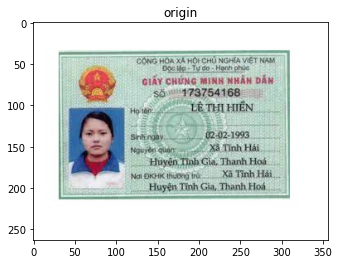

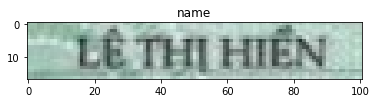

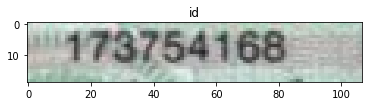

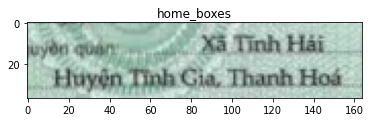

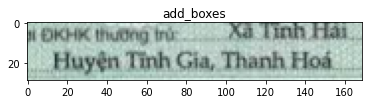

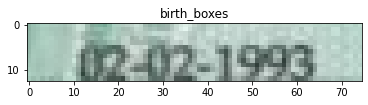

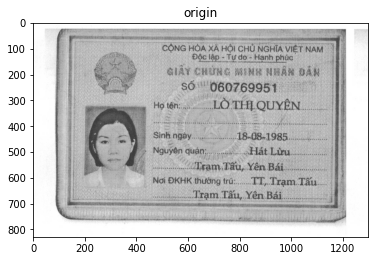

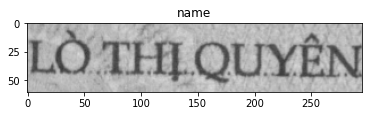

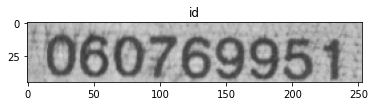

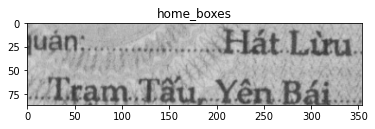

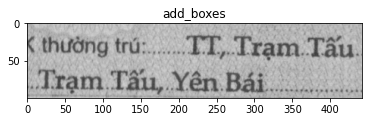

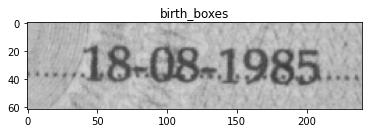

In [57]:
%matplotlib inline
mau = '/home/pot/Desktop/web-scan/test_data/identity_card/cmnd_mau.jpg'
no_mau = '/home/pot/Desktop/web-scan/test_data/identity_card/cmnd_no_mau.jpg'
make_image(mau)
make_image(no_mau)